# **Подготовка данных**

In [286]:
# Импорт библиотек
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [287]:
result_df = pd.read_csv('user_activity.csv', index_col=0)

df = result_df[['catalogue', 'delivery', 'about', 'marketing', 'addresses']]
print(result_df)

     catalogue   delivery      about  marketing  addresses  group
0    25.069670  27.396956  29.101515  21.295289  21.915558      1
1    19.560823  32.024930  31.958499  37.373336   9.940491      0
2    18.314888  34.343146  34.802284  39.740404  16.757736      0
3    19.778934  33.580437  18.168013  17.711648  16.934753      1
4    18.649462  20.670398  14.210398  24.337118  38.813844      2
..         ...        ...        ...        ...        ...    ...
995  15.571094  34.659144  11.527136  11.891328  18.462372      1
996  15.918471  15.911342  23.746976  19.860330  37.058662      2
997  17.026463  16.455021  14.305974  30.075952  31.402930      2
998  10.928539  20.365675  15.223949  22.424982  27.828055      2
999  19.888107  29.524180  34.181911  36.118931  20.301489      0

[1000 rows x 6 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1889de350>,
      dtype=object)

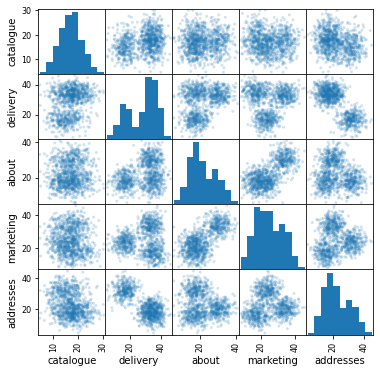

In [288]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6))

# **Алгоритм К-средних**

In [301]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df)

In [307]:
result_df["predicted_kmeans"] = kmeans.labels_
print(result_df["group"].value_counts())
print(result_df["predicted_kmeans"].value_counts())
result_df.head(20)

0    334
1    333
2    333
Name: group, dtype: int64
2    335
0    333
1    332
Name: predicted_kmeans, dtype: int64


catalogue   delivery      about  marketing  addresses  group  \
0   25.069670  27.396956  29.101515  21.295289  21.915558      1   
1   19.560823  32.024930  31.958499  37.373336   9.940491      0   
2   18.314888  34.343146  34.802284  39.740404  16.757736      0   
3   19.778934  33.580437  18.168013  17.711648  16.934753      1   
4   18.649462  20.670398  14.210398  24.337118  38.813844      2   
5   16.338637  20.935496  16.142961  20.256633  29.210123      2   
6   21.499245  27.915585  10.048201  28.838967  18.519981      1   
7    6.486419  22.958562  17.768092  22.435124  35.183231      2   
8   20.636308  33.105021  17.460903  18.500664   8.685742      1   
9   14.739392  22.235147  14.903570  16.843674  29.138654      2   
10  17.345710  29.378676  38.275557  25.684668  22.820200      0   
11  22.558592  34.502850  14.303614  26.456018  14.914772      1   
12  14.287315  39.378379  28.920699  34.689530  23.839571      0   
13  16.279082  12.850948  16.307277  21.792055  24.077733      2   
14  18.044102  13.987981  17.681046  25.724431  29.903280      2   
15  11.648143  17.355688  13.827134  20.076057  32.693362      2   
16  10.366417  22.257223  22.583464  27.298496  33.499865      2   
17  14.618915  11.517098  14.104048  17.238677  36.675040      2   
18  18.655723  35.748110  15.568147  12.421674  18.937223      1   
19  20.312448  41.449689  21.090154  19.218004   8.469910      1   

    predicted_kmeans  
0                  2  
1                  2  
2                  2  
3                  1  
4                  0  
5                  0  
6                  1  
7                  0  
8                  1  
9                  0  
10                 2  
11                 1  
12                 2  
13                 0  
14                 0  
15                 0  
16                 0  
17                 0  
18                 1  
19                 1

In [308]:
result_df["predicted_kmeans"] = result_df["predicted_kmeans"].map({0:2, 1:1, 2:0})
result_df.head(20)

catalogue   delivery      about  marketing  addresses  group  \
0   25.069670  27.396956  29.101515  21.295289  21.915558      1   
1   19.560823  32.024930  31.958499  37.373336   9.940491      0   
2   18.314888  34.343146  34.802284  39.740404  16.757736      0   
3   19.778934  33.580437  18.168013  17.711648  16.934753      1   
4   18.649462  20.670398  14.210398  24.337118  38.813844      2   
5   16.338637  20.935496  16.142961  20.256633  29.210123      2   
6   21.499245  27.915585  10.048201  28.838967  18.519981      1   
7    6.486419  22.958562  17.768092  22.435124  35.183231      2   
8   20.636308  33.105021  17.460903  18.500664   8.685742      1   
9   14.739392  22.235147  14.903570  16.843674  29.138654      2   
10  17.345710  29.378676  38.275557  25.684668  22.820200      0   
11  22.558592  34.502850  14.303614  26.456018  14.914772      1   
12  14.287315  39.378379  28.920699  34.689530  23.839571      0   
13  16.279082  12.850948  16.307277  21.792055  24.077733      2   
14  18.044102  13.987981  17.681046  25.724431  29.903280      2   
15  11.648143  17.355688  13.827134  20.076057  32.693362      2   
16  10.366417  22.257223  22.583464  27.298496  33.499865      2   
17  14.618915  11.517098  14.104048  17.238677  36.675040      2   
18  18.655723  35.748110  15.568147  12.421674  18.937223      1   
19  20.312448  41.449689  21.090154  19.218004   8.469910      1   

    predicted_kmeans  
0                  0  
1                  0  
2                  0  
3                  1  
4                  2  
5                  2  
6                  1  
7                  2  
8                  1  
9                  2  
10                 0  
11                 1  
12                 0  
13                 2  
14                 2  
15                 2  
16                 2  
17                 2  
18                 1  
19                 1

In [309]:
temp = result_df["predicted_kmeans"] - result_df["group"]
temp.value_counts(normalize=True)

 0    0.999
-1    0.001
dtype: float64

In [310]:
def colorize(df_column):
    return df_column.map({-1:"Black", 0:"Magenta", 1:"Orange", 2:"Blue"})

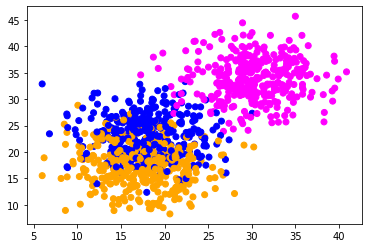

In [311]:
plt.scatter(result_df['about'], result_df['marketing'], c=colorize(result_df['group']))

In [312]:
plt.scatter(result_df['about'], result_df['marketing'], c=colorize(result_df['predicted_kmeans']))

# **Кластеризация методом DBSCAN**

In [313]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [314]:
X = StandardScaler().fit_transform(df.values)
db = DBSCAN(eps=0.75).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

result_df['predicted_dbscan'] = pd.DataFrame(db.labels_)

temp = result_df["predicted_dbscan"] - result_df["group"]
print(temp.value_counts(normalize=True))

Estimated number of clusters: 3
Estimated number of noise points: 150
 0    0.848
-3    0.055
-2    0.050
-1    0.046
 1    0.001
dtype: float64


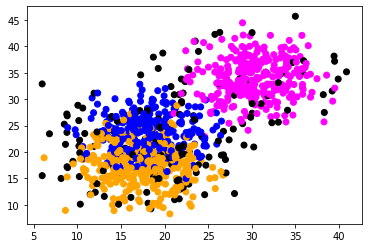

In [315]:
# Visualizing DBSCAN
plt.scatter(result_df['about'], result_df['marketing'],c=colorize(result_df["predicted_dbscan"]))

# **Кластеризация методом mean-shift (сдвиг среднего значения)**

In [316]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [317]:
result_df['predicted_ms'] = pd.DataFrame(ms.labels_)

temp = result_df["predicted_ms"] - result_df["group"]
print(temp.value_counts(normalize=True))

plt.scatter(result_df['about'], result_df['marketing'],c=colorize(result_df["predicted_ms"]))

 0    0.999
-1    0.001
dtype: float64
